In [516]:
import pandas as pd
import mysql.connector as mc
import matplotlib
import calendar

In [517]:
db = mc.connect(
  host='172.18.55.6',
  user='comandato',
  passwd='comandato123',
)
cur= db.cursor()

In [518]:
Dia='24'
Mes='03'
Anio='2019'
fecha_pago=Dia+Mes+Anio

In [519]:
F_Mes='MARZO'

# OBTENER GESTION DE ASESOR

### CONVENIO

In [520]:
querry_gestion_cuotas="""SELECT NRO_IDENTIFICACION_CLIENTE,COD_AGENTE,CAST(DATE_FORMAT(FECHA_GESTION,'%d') as UNSIGNED) as FECHA_GESTION,CONTACTO_GESTIONO,ACCION_REALIZADA,RESPUESTA_OBTENIDA,NUMERO_GESTION FROM SISTEMECUADOR_ATM.GESTION where FECHA_GESTION BETWEEN '{0}-{1}-00 00:00:00' AND '{0}-{1}-{2} 21:00:00';""".format(Anio,Mes,Dia)
gestion_cuotas=pd.read_sql(querry_gestion_cuotas, con=db)

In [521]:
gestion_cuotas.head()

,NRO_IDENTIFICACION_CLIENTE,COD_AGENTE,FECHA_GESTION,CONTACTO_GESTIONO,ACCION_REALIZADA,RESPUESTA_OBTENIDA,NUMERO_GESTION
0,0917270357,D013101,1,CLIENTE,HACER LLAMADA,ACUERDO DE PAGO,0993269746
1,0913563276,D013101,1,CLIENTE,HACER LLAMADA,ACUERDO DE PAGO,0992068655
2,0912533809,D013101,1,CLIENTE,HACER LLAMADA,ACUERDO DE PAGO,0999684088
3,0904823093,D013101,1,CLIENTE,HACER LLAMADA,ACUERDO DE PAGO,0967788875
4,0906134523,D013101,1,NO CONTACTO,HACER LLAMADA,BUZON DE MENSAJES,0969666819


In [522]:
gestion_asesor_cuotas=gestion_cuotas[(gestion_cuotas['ACCION_REALIZADA']=='HACER LLAMADA') & ((gestion_cuotas['CONTACTO_GESTIONO']=='CLIENTE') | (gestion_cuotas['CONTACTO_GESTIONO']=='TITULAR') |(gestion_cuotas['CONTACTO_GESTIONO']=='TERC. VALIDO'))& (gestion_cuotas['RESPUESTA_OBTENIDA']!='YA PAGO')]

In [523]:
gestion_asesor_cuotas=gestion_asesor_cuotas.sort_values(by=['FECHA_GESTION'],ascending=[True])
gestion_asesor_cuotas=gestion_asesor_cuotas.drop_duplicates(['NRO_IDENTIFICACION_CLIENTE'], keep='first')
gestion_asesor_cuotas = gestion_asesor_cuotas.rename(columns={'NRO_IDENTIFICACION_CLIENTE':'IDENTIFICACION'})

### CORRIENTE

In [524]:
querry_gestion="""SELECT NRO_IDENTIFICACION_CLIENTE,COD_AGENTE,CAST(DATE_FORMAT(FECHA_GESTION,'%d') as UNSIGNED) as FECHA_GESTION,CONTACTO_GESTIONO,ACCION_REALIZADA,RESPUESTA_OBTENIDA,NUMERO_GESTION FROM SISTEMECUADOR_ATM.GESTION where FECHA_GESTION BETWEEN '{0}-{1}-00 00:00:00' AND '{0}-{1}-{2} 21:00:00' AND COMENTARIOS_GESTIONO NOT LIKE '%CAMPAÑA CONVENIO%';""".format(Anio,Mes,Dia)
gestion=pd.read_sql(querry_gestion, con=db)

In [525]:
gestion_asesor=gestion[(gestion['ACCION_REALIZADA']=='HACER LLAMADA') & ((gestion['CONTACTO_GESTIONO']=='CLIENTE') | (gestion['CONTACTO_GESTIONO']=='TITULAR') |(gestion['CONTACTO_GESTIONO']=='TERC. VALIDO'))& (gestion['RESPUESTA_OBTENIDA']!='YA PAGO')]

In [526]:
gestion_asesor=gestion_asesor.sort_values(by=['FECHA_GESTION'],ascending=[True])

In [527]:
gestion_asesor=gestion_asesor.drop_duplicates(['NRO_IDENTIFICACION_CLIENTE'], keep='first')

In [528]:
gestion_asesor.head()

,NRO_IDENTIFICACION_CLIENTE,COD_AGENTE,FECHA_GESTION,CONTACTO_GESTIONO,ACCION_REALIZADA,RESPUESTA_OBTENIDA,NUMERO_GESTION
0,0917270357,D013101,1,CLIENTE,HACER LLAMADA,ACUERDO DE PAGO,0993269746
566,0913883757,D013140,1,TERC. VALIDO,HACER LLAMADA,MENSAJE CON TERCERO,0996670208
564,0913719076,D013140,1,TITULAR,HACER LLAMADA,VOLVER A LLAMAR,0983975019
556,0912343712,D013116,1,TITULAR,HACER LLAMADA,LOCALIZADO SIN ACUERDO,0982708013
554,0925588980,D013142,1,TERC. VALIDO,HACER LLAMADA,MENSAJE CON TERCERO,0992340441


# OBTENER GESTION IVR

In [529]:
querry_masivos="""SELECT NRO_IDENTIFICACION_CLIENTE,COD_AGENTE,CAST(DATE_FORMAT(FECHA_GESTION,'%d') as UNSIGNED) as FECHA_GESTION,CONTACTO_GESTIONO,ACCION_REALIZADA,RESPUESTA_OBTENIDA,NUMERO_GESTION FROM SISTEMECUADOR_ATM.gestion_ivr where FECHA_GESTION BETWEEN '{0}-{1}-00 00:00:00' AND '{0}-{1}-{2} 21:00:00';""".format(Anio,Mes,Dia)
gestion_masivos=pd.read_sql(querry_masivos, con=db)

In [530]:
gestion_ivr=gestion_masivos[((gestion_masivos['ACCION_REALIZADA']=='ENVIAR IVR') & (gestion_masivos['RESPUESTA_OBTENIDA']=='CONTESTA IVR'))|((gestion_masivos['ACCION_REALIZADA']=='ENVIAR SMS') & (gestion_masivos['RESPUESTA_OBTENIDA']=='SMS ENVIADO'))|((gestion_masivos['ACCION_REALIZADA']=='ENVIAR WHATSAPP') & (gestion_masivos['RESPUESTA_OBTENIDA']=='ENVIO WHATSAPP'))]

In [531]:
gestion_ivr.tail()

,NRO_IDENTIFICACION_CLIENTE,COD_AGENTE,FECHA_GESTION,CONTACTO_GESTIONO,ACCION_REALIZADA,RESPUESTA_OBTENIDA,NUMERO_GESTION
49339,0992686812001,D05554,22,TITULAR,ENVIAR SMS,SMS ENVIADO,0997486876
49340,0992695447001,D05554,22,TITULAR,ENVIAR SMS,SMS ENVIADO,0994436615
49341,0992744758001,D05554,22,TITULAR,ENVIAR SMS,SMS ENVIADO,0994993424
49342,0992783621001,D05554,22,TITULAR,ENVIAR SMS,SMS ENVIADO,0996038681
49343,0992901969001,D05554,22,TITULAR,ENVIAR SMS,SMS ENVIADO,0995432910


# OBTENER GESTION SMS

In [532]:
gestion_sms=gestion_masivos[gestion_masivos['ACCION_REALIZADA']=='ENVIAR SMS']

In [533]:
gestion_sms.head()

,NRO_IDENTIFICACION_CLIENTE,COD_AGENTE,FECHA_GESTION,CONTACTO_GESTIONO,ACCION_REALIZADA,RESPUESTA_OBTENIDA,NUMERO_GESTION
0,1000559797,D05554,1,TITULAR,ENVIAR SMS,SMS ENVIADO,0997209664
1,1001296837,D05554,1,TITULAR,ENVIAR SMS,SMS ENVIADO,0995054008
2,1002018370,D05554,1,TITULAR,ENVIAR SMS,SMS ENVIADO,0980561506
3,1002039863,D05554,1,TITULAR,ENVIAR SMS,SMS ENVIADO,0997856430
4,1002339149,D05554,1,TITULAR,ENVIAR SMS,SMS ENVIADO,0991965227


In [534]:
gestiones=[gestion_asesor,gestion_ivr,gestion_sms]
total_gestiones=pd.concat(gestiones)

In [535]:
total_gestiones.head()

,NRO_IDENTIFICACION_CLIENTE,COD_AGENTE,FECHA_GESTION,CONTACTO_GESTIONO,ACCION_REALIZADA,RESPUESTA_OBTENIDA,NUMERO_GESTION
0,0917270357,D013101,1,CLIENTE,HACER LLAMADA,ACUERDO DE PAGO,0993269746
566,0913883757,D013140,1,TERC. VALIDO,HACER LLAMADA,MENSAJE CON TERCERO,0996670208
564,0913719076,D013140,1,TITULAR,HACER LLAMADA,VOLVER A LLAMAR,0983975019
556,0912343712,D013116,1,TITULAR,HACER LLAMADA,LOCALIZADO SIN ACUERDO,0982708013
554,0925588980,D013142,1,TERC. VALIDO,HACER LLAMADA,MENSAJE CON TERCERO,0992340441


In [536]:
total_gestiones=total_gestiones.drop_duplicates(['NRO_IDENTIFICACION_CLIENTE'], keep='first')

In [537]:
total_gestiones = total_gestiones.rename(columns={'NRO_IDENTIFICACION_CLIENTE':'IDENTIFICACION'})

In [538]:
total_gestiones.head()

,IDENTIFICACION,COD_AGENTE,FECHA_GESTION,CONTACTO_GESTIONO,ACCION_REALIZADA,RESPUESTA_OBTENIDA,NUMERO_GESTION
0,0917270357,D013101,1,CLIENTE,HACER LLAMADA,ACUERDO DE PAGO,0993269746
566,0913883757,D013140,1,TERC. VALIDO,HACER LLAMADA,MENSAJE CON TERCERO,0996670208
564,0913719076,D013140,1,TITULAR,HACER LLAMADA,VOLVER A LLAMAR,0983975019
556,0912343712,D013116,1,TITULAR,HACER LLAMADA,LOCALIZADO SIN ACUERDO,0982708013
554,0925588980,D013142,1,TERC. VALIDO,HACER LLAMADA,MENSAJE CON TERCERO,0992340441


# MULTAS ASIGNADAS

In [539]:
multas="""SELECT *   FROM SISTEMECUADOR_ATM.MULTAS_MENSUALES where Mes={0}""".format(Mes)
resultado_multas=pd.read_sql(multas, con=db)

In [540]:
resultado_multas.head()

,Cedula,No_multa,Anio,Mes,Dia,Dia_retiro,Dias_mora,Saldo,Cartera,Segmento,Descripcion,Placa,Pago,dia_pago,tipo
0,00042448K,5722394,2019,3,6,None,135,115.80,CORRIENTE,MULTAS NUEVAS,COND.EXCEDA DENTRO RANGO MODERADO LÍMITES DE V...,GRP0269,None,None,None
1,100025030,4929258,2019,3,6,None,312,19.30,CORRIENTE,MULTAS NUEVAS,COND. QUE NO UTILICE CINTURON DE SEGURIDAD.,nan,None,None,None
2,1000400828,5512924,2019,3,8,None,187,115.80,CORRIENTE,MULTAS NUEVAS,COND.EXCEDA DENTRO RANGO MODERADO LÍMITES DE V...,TBF1577,None,None,None
3,1000558195,6243589,2019,3,6,None,12,394.00,CORRIENTE,5. VENCIDA FASE II,MULTA POR INVASIÓN AL CARRIL DE USO EXCLUSIVO ...,GBN0383,None,None,None
4,1000559797,4171791,2019,3,6,None,492,56.25,CORRIENTE,MULTAS NUEVAS,DOBLE COLUMNA / ESTACIONAR SITIOS PROHIB. FUER...,LBG0289,None,None,None


In [541]:
dias_mora_multa=resultado_multas[['No_multa','Dias_mora']].copy()

In [542]:
dias_mora_multa = dias_mora_multa.rename(columns={'No_multa':'ID_FACTURA','Dias_mora':'DIAS_MORA'})
dias_mora_multa['ID_FACTURA']=dias_mora_multa['ID_FACTURA'].apply(int)

In [543]:
dias_mora_multa.head()

,ID_FACTURA,DIAS_MORA
0,5722394,135
1,4929258,312
2,5512924,187
3,6243589,12
4,4171791,492


# PAGOS

In [544]:
pago_corr={
    'ruta':'..\..\..\BASES DATATOOLS\PAGOS\\2019\\'+F_Mes+'\Sitema de cobro '+fecha_pago+'.xlsx',
    'hoja':'PAGOS_CORRIENTE',
    'cartera':'CORRIENTE',
    'identificador':'IDENTIFICACION'
}

pago_cuot={
    'ruta':'..\..\..\BASES DATATOOLS\PAGOS\\2019\\'+F_Mes+'\\Sitema de cobro '+fecha_pago+'.xlsx',
    'hoja':'PAGOS_CUOTA_CERO',
    'cartera':'CUOTA',
    'identificador':'ID'
}

pago_conv={
    'ruta':'..\..\..\BASES DATATOOLS\PAGOS\\2019\\'+F_Mes+'\\Sitema de cobro '+fecha_pago+'.xlsx',
    'hoja':'PAGOS_CONVENIOS',
    'cartera':'CONVENIO',
    'identificador':'ID'
}

In [545]:
pagos_corr=pd.read_excel(open(pago_corr['ruta'],'rb'), sheet_name=pago_corr['hoja'], dtype={pago_corr['identificador']: str})
pagos_cuot=pd.read_excel(open(pago_cuot['ruta'],'rb'), sheet_name=pago_cuot['hoja'], dtype={pago_cuot['identificador']: str})
pagos_conv=pd.read_excel(open(pago_conv['ruta'],'rb'), sheet_name=pago_conv['hoja'], dtype={pago_conv['identificador']: str})

In [546]:
def agregar_ceros(base):
    ced=base['ID']
    if len(ced)==9 or len(ced)==12 :
        if ced.isdigit():
            return '0'+ced
    return ced

In [547]:
pagos_cuot['ID']=pagos_cuot.apply(agregar_ceros,axis=1)

### CORRIENTE

In [548]:
def agregar_ceros2(base):
    ced=base['IDENTIFICACION']
    if len(ced)==9 or len(ced)==12 :
        if ced.isdigit():
            return '0'+ced
    return ced

In [549]:
pagos_corr['IDENTIFICACION']=pagos_corr.apply(agregar_ceros2,axis=1)

In [550]:
def tipo(base):
    casa=base['CASA_COBRO']
    if casa=='SISTEMA SALDO MENORES':
        return 'MENORES'
    else:
        return 'CORRIENTE'

In [551]:
pagos_corr['DIA_PAGO'] = pagos_corr['FECHA_PAGO'].dt.day
pagos_corr = pagos_corr.rename(columns={'CASA COBRO':'CASA_COBRO'})
pagos_corr['TIPO']=pagos_corr.apply(tipo,axis=1)
cruce_pag_corr=pd.merge(pagos_corr,dias_mora_multa,on=['ID_FACTURA'],how='left')
cruce_pag_corr=cruce_pag_corr[['IDENTIFICACION','ID_FACTURA','VALOR_INFRACCION','FECHA_PAGO','DIA_PAGO','TIPO','DIAS_MORA']]
cruce_pag_corr.head()

,IDENTIFICACION,ID_FACTURA,VALOR_INFRACCION,FECHA_PAGO,DIA_PAGO,TIPO,DIAS_MORA
0,1804423620,5579784,19.3,2019-03-06,6,CORRIENTE,169
1,0600890420,5940627,115.8,2019-03-06,6,CORRIENTE,81
2,2400196073,5216205,57.9,2019-03-06,6,CORRIENTE,248
3,0916739592,5327448,57.9,2019-03-06,6,CORRIENTE,224
4,0201142536,5543813,57.9,2019-03-06,6,CORRIENTE,177


## MENORES

In [552]:
def identificar_pago(base):
    valor1 = base['VALOR_INFRACCION']
    valor2 = base['VALOR_PAGO_CAPITAL']
    mora = base['DIAS_MORA']
    if mora<=180:
        return valor2
    return valor1

In [553]:
pagos_cuot['TIPO']='CUOTA'
pagos_cuot['DIA_PAGO'] = pagos_cuot['FECHA_RE'].dt.day
pagos_cuot['MONTO_PAGO']=pagos_cuot.apply(identificar_pago,axis=1)
pagos_cuot_resumen=pagos_cuot[['ID','ID_FACTURA_INICIAL','MONTO_PAGO','FECHA_RE','DIA_PAGO','TIPO']]
pagos_cuot_resumen = pagos_cuot_resumen.rename(columns={'ID':'IDENTIFICACION','ID_FACTURA_INICIAL':'ID_FACTURA','MONTO_PAGO':'VALOR_INFRACCION','FECHA_RE':'FECHA_PAGO'})
cruce_pag_cuot=pd.merge(pagos_cuot_resumen,dias_mora_multa,on=['ID_FACTURA'],how='left')
cruce_pag_cuot.head()

,IDENTIFICACION,ID_FACTURA,VALOR_INFRACCION,FECHA_PAGO,DIA_PAGO,TIPO,DIAS_MORA
0,0300694957,1434635,732.00,2019-03-06 14:01:58,6,CUOTA,1141
1,0906777818,6225502,30.00,2019-03-06 12:59:37,6,CUOTA,15
2,0908016892,5158093,57.90,2019-03-07 09:20:35,7,CUOTA,259
3,0914839717,6266667,600.02,2019-03-06 10:08:46,6,CUOTA,16
4,0916000011,6094543,23.64,2019-03-06 13:46:38,6,CUOTA,49


In [554]:
cruce_pag_cuot.columns

Index(['IDENTIFICACION', 'ID_FACTURA', 'VALOR_INFRACCION', 'FECHA_PAGO',
       'DIA_PAGO', 'TIPO', 'DIAS_MORA'],
      dtype='object')

# CONVENIO

In [555]:
def agregar_ceros3(base):
    ced=base['ID']
    if len(ced)==9 or len(ced)==12:
        if ced.isdigit():
            return '0'+ced
    return ced

In [556]:
pagos_conv['TIPO']='CONVENIO'
pagos_conv['DIA_PAGO'] = pagos_conv['FECHA_PAGO'].dt.day

In [557]:
pagos_conv['ID']=pagos_conv.apply(agregar_ceros3,axis=1)

In [558]:
pagos_conv.head()

,ID,ID_CONVENIO,NRO_CUOTA_EMISION,VALOR_PAGAR_CUOTA,FECHA_PAGO,FECHA_VENCIMIENTO,CASA COBRO,TIPO,DIA_PAGO
0,0919454710,291961,2,59.64,2019-03-01,2018-02-26,SISTEMA DE COBRO DEL ECUADOR,CONVENIO,1
1,0919454710,291961,1,59.64,2019-03-01,2018-01-26,SISTEMA DE COBRO DEL ECUADOR,CONVENIO,1
2,0919454710,291961,5,59.64,2019-03-01,2018-05-26,SISTEMA DE COBRO DEL ECUADOR,CONVENIO,1
3,0919454710,291961,3,59.64,2019-03-01,2018-03-26,SISTEMA DE COBRO DEL ECUADOR,CONVENIO,1
4,0919454710,291961,4,59.64,2019-03-01,2018-04-26,SISTEMA DE COBRO DEL ECUADOR,CONVENIO,1


In [559]:
pagos_conv_resumen=pagos_conv[['ID','ID_CONVENIO','VALOR_PAGAR_CUOTA','FECHA_PAGO','DIA_PAGO','TIPO','NRO_CUOTA_EMISION']]
pagos_conv_resumen = pagos_conv_resumen.rename(columns={'ID':'IDENTIFICACION','ID_CONVENIO':'ID_FACTURA','VALOR_PAGAR_CUOTA':'VALOR_INFRACCION','NRO_CUOTA_EMISION':'DIAS_MORA'})

cruce_pag_conv=pd.merge(pagos_conv_resumen,gestion_asesor_cuotas,on=['IDENTIFICACION'],how='left')

In [560]:
cruce_pag_conv.head()

,IDENTIFICACION,ID_FACTURA,VALOR_INFRACCION,FECHA_PAGO,DIA_PAGO,TIPO,DIAS_MORA,COD_AGENTE,FECHA_GESTION,CONTACTO_GESTIONO,ACCION_REALIZADA,RESPUESTA_OBTENIDA,NUMERO_GESTION
0,0919454710,291961,59.64,2019-03-01,1,CONVENIO,2,NaN,NaN,NaN,NaN,NaN,NaN
1,0919454710,291961,59.64,2019-03-01,1,CONVENIO,1,NaN,NaN,NaN,NaN,NaN,NaN
2,0919454710,291961,59.64,2019-03-01,1,CONVENIO,5,NaN,NaN,NaN,NaN,NaN,NaN
3,0919454710,291961,59.64,2019-03-01,1,CONVENIO,3,NaN,NaN,NaN,NaN,NaN,NaN
4,0919454710,291961,59.64,2019-03-01,1,CONVENIO,4,NaN,NaN,NaN,NaN,NaN,NaN


In [561]:
#cruce_pag_conv=cruce_pag_conv[['IDENTIFICACION', 'ID_FACTURA', 'VALOR_INFRACCION', 'FECHA_PAGO','DIA_PAGO', 'TIPO', 'DIAS_MORA']]

## UNIR LOS PAGOS

In [562]:
pagos=[cruce_pag_cuot,cruce_pag_corr]
total_pagos=pd.concat(pagos)

In [563]:
total_pagos['TIPO'].value_counts()

CORRIENTE    1853
CUOTA         681
Name: TIPO, dtype: int64

In [564]:
def honorarios(base):
    tipo=base['TIPO']
    mora=base['DIAS_MORA']
    valor=base['VALOR_INFRACCION']
    if tipo=='CONVENIO':
        return valor*0.035
    if tipo=='CUOTA'and mora>180:
        return valor*0.05
    if mora<61:
        return valor*0.02
    if mora<181:
        return valor*0.04
    if mora<361:
        return valor*0.05
    if mora>360:
        return valor*0.06
    return 0.0

In [565]:
total_pagos['HONORARIOS']=total_pagos.apply(honorarios,axis=1)
total_pagos.head()

,IDENTIFICACION,ID_FACTURA,VALOR_INFRACCION,FECHA_PAGO,DIA_PAGO,TIPO,DIAS_MORA,HONORARIOS
0,0300694957,1434635,732.00,2019-03-06 14:01:58,6,CUOTA,1141,36.6000
1,0906777818,6225502,30.00,2019-03-06 12:59:37,6,CUOTA,15,0.6000
2,0908016892,5158093,57.90,2019-03-07 09:20:35,7,CUOTA,259,2.8950
3,0914839717,6266667,600.02,2019-03-06 10:08:46,6,CUOTA,16,12.0004
4,0916000011,6094543,23.64,2019-03-06 13:46:38,6,CUOTA,49,0.4728


In [566]:
total_pagos['TIPO'].value_counts()

CORRIENTE    1853
CUOTA         681
Name: TIPO, dtype: int64

## CRUCE CON GESTIONES

In [567]:
cruce_honorario=pd.merge(total_pagos,total_gestiones,on=['IDENTIFICACION'],how='left')

In [568]:
cruce_honorario.head()

,IDENTIFICACION,ID_FACTURA,VALOR_INFRACCION,FECHA_PAGO,DIA_PAGO,TIPO,DIAS_MORA,HONORARIOS,COD_AGENTE,FECHA_GESTION,CONTACTO_GESTIONO,ACCION_REALIZADA,RESPUESTA_OBTENIDA,NUMERO_GESTION
0,0300694957,1434635,732.00,2019-03-06 14:01:58,6,CUOTA,1141,36.6000,NaN,NaN,NaN,NaN,NaN,NaN
1,0906777818,6225502,30.00,2019-03-06 12:59:37,6,CUOTA,15,0.6000,D05554,6.0,TITULAR,ENVIAR SMS,SMS ENVIADO,0980098603
2,0908016892,5158093,57.90,2019-03-07 09:20:35,7,CUOTA,259,2.8950,D013143,6.0,TITULAR,HACER LLAMADA,ACUERDO DE CONVENIO,0939210577
3,0914839717,6266667,600.02,2019-03-06 10:08:46,6,CUOTA,16,12.0004,NaN,NaN,NaN,NaN,NaN,NaN
4,0916000011,6094543,23.64,2019-03-06 13:46:38,6,CUOTA,49,0.4728,D013124,6.0,TITULAR,HACER LLAMADA,ACUERDO DE CONVENIO,0997835047


In [569]:
def validar(base):
    dia_pago=base['DIA_PAGO']
    dia_gestion=base['FECHA_GESTION']
    if dia_gestion<=dia_pago:
        return 'SI'
    return 'NO'

In [570]:
cruce_honorario['VALIDO']=cruce_honorario.apply(validar,axis=1)

In [571]:
cruce_pag_conv['HONORARIOS']=cruce_pag_conv.apply(honorarios,axis=1)
cruce_pag_conv['VALIDO']=cruce_pag_conv.apply(validar,axis=1)

In [572]:
pagos_total=[cruce_honorario,cruce_pag_conv]
total_pagos_all=pd.concat(pagos_total)

c:\users\michael\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


In [573]:
total_pagos_all['TIPO'].value_counts()

CORRIENTE    1853
CONVENIO      752
CUOTA         681
Name: TIPO, dtype: int64

## HONORARIOS VALIDOS

In [574]:
print(total_pagos_all[total_pagos_all['VALIDO']=='SI'].groupby('TIPO').agg({'VALOR_INFRACCION':'sum','HONORARIOS':'sum'}))
print(total_pagos_all[total_pagos_all['VALIDO']=='SI'].groupby('TIPO').agg({'VALOR_INFRACCION':'sum','HONORARIOS':'sum'}).sum())

           VALOR_INFRACCION  HONORARIOS
TIPO                                   
CONVENIO            9901.72    346.5602
CORRIENTE          64060.20   1993.3180
CUOTA              29450.39   1216.0426
VALOR_INFRACCION    103412.3100
HONORARIOS            3555.9208
dtype: float64


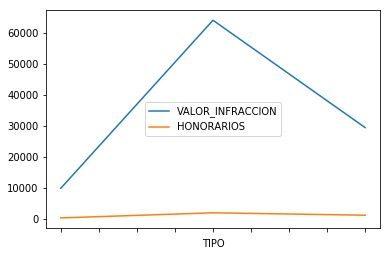

In [575]:
total_pagos_all[total_pagos_all['VALIDO']=='SI'].groupby('TIPO').agg({'VALOR_INFRACCION':'sum','HONORARIOS':'sum'}).plot.line()

## HONORARIOS TOTALES

In [576]:
print(total_pagos_all.groupby('TIPO').agg({'VALOR_INFRACCION':'sum','HONORARIOS':'sum'}))
print(total_pagos_all.groupby('TIPO').agg({'VALOR_INFRACCION':'sum','HONORARIOS':'sum'}).sum())

           VALOR_INFRACCION  HONORARIOS
TIPO                                   
CONVENIO           46090.06   1613.1521
CORRIENTE         151664.85   4888.4830
CUOTA              46287.76   1884.5383
VALOR_INFRACCION    244042.6700
HONORARIOS            8386.1734
dtype: float64


## HONORARIOS NO VALIDOS

In [577]:
print(total_pagos_all[total_pagos_all['VALIDO']=='NO'].groupby('TIPO').agg({'VALOR_INFRACCION':'sum','HONORARIOS':'sum'}))
print(total_pagos_all[total_pagos_all['VALIDO']=='NO'].groupby('TIPO').agg({'VALOR_INFRACCION':'sum','HONORARIOS':'sum'}).sum())

           VALOR_INFRACCION  HONORARIOS
TIPO                                   
CONVENIO           36188.34   1266.5919
CORRIENTE          87604.65   2895.1650
CUOTA              16837.37    668.4957
VALOR_INFRACCION    140630.3600
HONORARIOS            4830.2526
dtype: float64


In [578]:
nuevo_archivo='ANALISIS DE PAGOS.xlsx'
writer = pd.ExcelWriter(nuevo_archivo, engine='xlsxwriter')
total_pagos_all.to_excel(writer, sheet_name='GESTION TOTAL')
worksheet = writer.sheets['GESTION TOTAL']
writer.save()

In [579]:
nuevo_archivo='GESTION ASESOR.xlsx'
writer = pd.ExcelWriter(nuevo_archivo, engine='xlsxwriter')
gestion_asesor.to_excel(writer, sheet_name='GESTION TOTAL')
worksheet = writer.sheets['GESTION TOTAL']
writer.save()